# Greendata Consulting



In [1]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import xlrd
import re
shark_df = pd.read_excel("GSAF5.xls")

## Primer vistazo al dataframe

In [3]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
# Show first 5 rows of the dataframe
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Show the dimensions of the dataframe to check the volume of data
shark_df.shape

(6969, 23)

In [6]:
# Show name of columns
shark_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [7]:
# Show column's information
shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6944 non-null   object 
 1   Year            6942 non-null   float64
 2   Type            6926 non-null   object 
 3   Country         6894 non-null   object 
 4   State           6462 non-null   object 
 5   Location        6379 non-null   object 
 6   Activity        6358 non-null   object 
 7   Name            6724 non-null   object 
 8   Sex             6365 non-null   object 
 9   Age             3950 non-null   object 
 10  Injury          6909 non-null   object 
 11  Unnamed: 11     6382 non-null   object 
 12  Time            3418 non-null   object 
 13  Species         3812 non-null   object 
 14  Source          6925 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

## Documentar la eliminación de columnas con valores nulos y justificarlas

In [8]:
# Show not null values of 'Unnamed: 21' column 
not_null_values_21 = shark_df.loc[shark_df['Unnamed: 21'].notnull(), 'Unnamed: 21'].unique()
not_null_values_21

array(['stopped here'], dtype=object)

In [9]:
# Show not null values of 'Unnamed: 22' column 
not_null_values_22 = shark_df.loc[shark_df['Unnamed: 22'].notnull(), 'Unnamed: 22'].unique()
not_null_values_22

array(['Teramo', 'change filename'], dtype=object)

In [10]:
# Drop columns with null values
shark_df.drop(columns=['Unnamed: 21', 'Unnamed: 22'],inplace=True)

In [11]:
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
shark_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Unnamed: 11', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

## Corregir nombre de columnas

### Columna Unnamed: 11

In [13]:
# Show not null values of 'Unnamed: 11' column 
not_null_values_11 = shark_df.loc[shark_df['Unnamed: 11'].notnull(), 'Unnamed: 11'].unique()
not_null_values_11

array(['N', 'Y', 'M', 'F', 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N',
       'N ', 'y'], dtype=object)

In [14]:
# Show value counts of Unnamed: 11 column
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4832
Y          1460
UNKNOWN      71
 N            7
M             3
F             3
n             1
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [15]:
# Formatear elementos de la columna Unnamed 11 que no tienen formato correcto
# Cambiar n minúsculas a n mayúsculas
shark_df['Unnamed: 11'].replace('n', 'N', inplace=True)

In [16]:
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4833
Y          1460
UNKNOWN      71
 N            7
M             3
F             3
Nq            1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [17]:
# Cambiar n con espacio a n normal
shark_df['Unnamed: 11'].replace('N ', 'N', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4834
Y          1460
UNKNOWN      71
 N            7
M             3
F             3
Nq            1
2017          1
Y x 2         1
y             1
Name: count, dtype: int64

In [18]:
# Cambiar espacio n a n normal
shark_df['Unnamed: 11'].replace(' N', 'N', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4841
Y          1460
UNKNOWN      71
M             3
F             3
Nq            1
2017          1
Y x 2         1
y             1
Name: count, dtype: int64

In [19]:
# Cambiar nq a n normal
shark_df['Unnamed: 11'].replace('Nq', 'N', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1460
UNKNOWN      71
M             3
F             3
2017          1
Y x 2         1
y             1
Name: count, dtype: int64

In [20]:
# Cambiar y minúsculas a y mayúsculas
shark_df['Unnamed: 11'].replace('y', 'Y', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      71
M             3
F             3
2017          1
Y x 2         1
Name: count, dtype: int64

In [21]:
# Eliminamos valores que no significativos para el universo (M, F, 2017, Y x 2)
shark_df['Unnamed: 11'].replace('', 'UNKNOWN', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      71
M             3
F             3
2017          1
Y x 2         1
Name: count, dtype: int64

In [22]:
# Eliminamos valores que no significativos para el universo (M, F, 2017, Y x 2)
shark_df['Unnamed: 11'].replace('F', 'UNKNOWN', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      74
M             3
2017          1
Y x 2         1
Name: count, dtype: int64

In [23]:
# Eliminamos valores que no significativos para el universo (M, F, 2017, Y x 2)
shark_df['Unnamed: 11'].replace(2017, 'UNKNOWN', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      75
M             3
Y x 2         1
Name: count, dtype: int64

In [24]:
# Eliminamos valores que no significativos para el universo (M, F, 2017, Y x 2)
shark_df['Unnamed: 11'].replace('Y x 2', 'UNKNOWN', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      76
M             3
Name: count, dtype: int64

In [25]:
# Eliminamos valores que no significativos para el universo (M, F, 2017, Y x 2)
shark_df['Unnamed: 11'].replace('M', 'UNKNOWN', inplace=True)
shark_df['Unnamed: 11'].value_counts()

Unnamed: 11
N          4842
Y          1461
UNKNOWN      79
Name: count, dtype: int64

In [26]:
# Comparamos las columnas de injury y unnamed: 11
shark_df[["Injury", "Unnamed: 11"]]

,Injury,Unnamed: 11
0,"Minor injuries to back, abdomen and legs",NaN
1,"No injury, shark bit surfboard",N
2,Lacerations to left foot,N
3,Leg bitten,N
4,Calf of lower left leg injured,N
...,...,...
6964,NaN,NaN
6965,NaN,NaN
6966,NaN,NaN
6967,NaN,NaN


In [27]:
# Filtramos solo los unnamed: 11 que sean YES
shark_df[shark_df['Unnamed: 11']== "Y"]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order
10,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023",NaN,NaN,NaN,NaN,NaN,NaN
11,29 Dec-2023,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,FATAL,Y,13h00,White shark,"EuroESEuro, 12/31/2023",NaN,NaN,NaN,NaN,NaN,NaN
12,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,Y,13h30,"White shark, 13'","S. DeMarchi, GSAF",NaN,NaN,NaN,NaN,NaN,NaN
16,14 Dec-2023,2023.0,Questionable,MEXICO,Guerrero,"Playa Quieta, Ixtapa, Zihuatanejo",Swimming,Joseph Leopold Bynens,M,66,FATAL,Y,09h15,Shark involment not confirmed,"EL Pais, 12/15/2023",NaN,NaN,NaN,NaN,NaN,NaN
19,04 Dec-2023,2023.0,Unprovoked,BAHAMAS,New Providence Isoad,Sandals Resort,Paddle boarding,Lauren Erickson Van Wart,F,44,FATAL,Y,11h00,NaN,"NBC News, 12/4/2023",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6942,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [28]:
# Cambiar el nombre a la columna unnamed: 11
shark_df.rename(columns= {'Unnamed: 11': 'Fatality'}, inplace=True)
shark_df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatality', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order'],
      dtype='object')

### Columna href formula

In [29]:
# Comprobación de valores repetidos entre href formula y href
repetidos = shark_df['href formula'].isin(shark_df['href']).sum()
repetidos

6850

In [30]:
# Eliminar columna href formula
shark_df.drop(columns=['href formula'],inplace=True)

In [31]:
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source,pdf,href,Case Number,Case Number.1,original order
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN


### Columna Case Number1

In [32]:
# Comprobación de valores repetidos entre case number y case numer.1
repetidos = shark_df['Case Number'].isin(shark_df['Case Number.1']).sum()
repetidos

6920

In [33]:
# Comprobar cuál de las dos columnas tiene más datos
shark_df['Case Number.1'].value_counts()

Case Number.1
2012.09.02.b    2
1913.08.27.R    2
1980.07.00      2
2021.12.06      2
1920.00.00.b    2
               ..
2002.12.21      1
2002.12.24      1
2002.12.29      1
2003.01.02      1
ND.0001         1
Name: count, Length: 6775, dtype: int64

In [34]:
# Comprobar cuál de las dos columnas tiene más datos
shark_df['Case Number'].value_counts()

Case Number
2021.07.23      2
1907.10.16.R    2
2012.09.02.b    2
2005.04.06      2
2009.12.18      2
               ..
2003.01.03      1
2003.01.17      1
2003.02.08      1
2003.02.11      1
ND.0001         1
Name: count, Length: 6777, dtype: int64

In [35]:
# Eliminar columna Case Number.1
shark_df.drop(columns=['Case Number.1'],inplace=True)

In [36]:
shark_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source,pdf,href,Case Number,original order
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN


### Comprobar contenido de las columnas

In [37]:
# Comprobar contenido de columna original order
shark_df['original order'].value_counts()

original order
6369.0    2
569.0     2
6802.0    1
2272.0    1
2262.0    1
         ..
4536.0    1
4537.0    1
4538.0    1
4539.0    1
2.0       1
Name: count, Length: 6797, dtype: int64

In [38]:
# Comprobar contenido de columna original href
shark_df['href'].value_counts()

href
http://sharkattackfile.net/spreadsheets/pdf_directory/w014.01.25-Grant.pdf           4
http://sharkattackfile.net/spreadsheets/pdf_directory/2014.10.02.b-Vandenberg.pdf    3
http://sharkattackfile.net/spreadsheets/pdf_directory/1934.12.23.a-b-Inman.pdf       2
http://sharkattackfile.net/spreadsheets/pdf_directory/1907.10.16.R-HongKong.pdf      2
http://sharkattackfile.net/spreadsheets/pdf_directory/1916.12.08.a-b-German.pdf      2
                                                                                    ..
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.01.03-Menking.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.01.17-scavenging.pdf      1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.02.08-Purcell.pdf         1
http://sharkattackfile.net/spreadsheets/pdf_directory/2003.02.11-Plumridge.pdf       1
http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf              1
Name: count, Length: 6776, dtype: int6

In [39]:
# Comprobar contenido de columna pdf
shark_df['pdf'].value_counts()

pdf
1907.10.16.R-HongKong.pdf            2
1921.11.27.a-b-Jack.pdf              2
1935.06.05.R-SolomonIslands.pdf      2
1916.12.08.a-b-German.pdf            2
1929.03.04.a-b.Roads-Aldridge.pdf    2
                                    ..
2003.04.19-SD.pdf                    1
2003.04.20.a-StephenFlowers.pdf      1
2003.04.20.b-Albright.pdf            1
2003.04.20.c-Ryan.pdf                1
ND-0001-Ceylon.pdf                   1
Name: count, Length: 6789, dtype: int64

# Nuevo dataframe sin columnas

In [40]:
# Hacemos una copia del dataframe original con las columnas relevantes
shark_df_rel = shark_df.copy()

In [41]:
# Eliminamos las 4 columnas que no queremos
shark_df_rel.drop(columns=['pdf', 'href', 'Case Number', 'original order'],inplace=True)

In [42]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"


## Columna Year

In [43]:
# Comprobar contenido de columna Year
shark_df_rel['Year'].value_counts()

Year
2015.0    143
2017.0    139
2016.0    131
0.0       129
2011.0    128
         ... 
1784.0      1
1783.0      1
1780.0      1
1779.0      1
1819.0      1
Name: count, Length: 259, dtype: int64

In [44]:
# Eliminar valores nulos de la columna Year
shark_df_rel.dropna(subset=['Year'])

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"
6942,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938"


In [45]:
# Convertir la columna Year a tipo numérico manejando errores
shark_df_rel['Year'] = pd.to_numeric(shark_df_rel['Year'], errors='coerce')
# Reemplazar NA por 0 
shark_df_rel['Year'] = shark_df_rel['Year'].fillna(0)
# Convertir columna Year a tipo int
shark_df_rel['Year'] = shark_df_rel['Year'].astype(int)

## Columna Age

In [46]:
# Eliminar caracteres en los valores que no sean dígitos

# Reemplazar espacios
shark_df_rel['Age'].replace('', pd.NA, inplace=True)
# Reemplazar NA por 0 
shark_df_rel['Age'] = shark_df_rel['Age'].fillna(0)
# Reemplazar 0 por not defined
shark_df_rel['Age'].replace(0, 'not defined', inplace=True)
# Convertir columna Age a tipo int
shark_df_rel['Age'] = shark_df_rel['Age'].astype(object)

In [47]:
shark_df_rel.dtypes

Date        object
Year         int64
Type        object
Country     object
State       object
Location    object
Activity    object
Name        object
Sex         object
Age         object
Injury      object
Fatality    object
Time        object
Species     object
Source      object
dtype: object

## Cambiar todos los NaN values del DataFrame

In [48]:
shark_df_rel.fillna("not defined", inplace=True)

In [49]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,"Bull shark, 7'","Times of India, 2/14/2024"


In [50]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,"Bull shark, 7'","Times of India, 2/14/2024"


## Columna Species

In [51]:
# Quitar espacio en blanco del final
shark_df_rel.rename(columns={'Species ': 'Species'}, inplace=True)

In [52]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,"Bull shark, 7'","Times of India, 2/14/2024"


## Cuando formateemos las fechas, copiar la celda fecha y eliminar mes y día

## Columna Type

In [53]:
# Comprobar contenido de columna Type
shark_df['Type'].value_counts()

Type
Unprovoked             5107
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [54]:
# Cambiar ' Provoked' por Provoked
shark_df_rel['Type'].replace(' Provoked', 'Provoked', inplace=True)
shark_df_rel['Type'].value_counts()

Type
Unprovoked             5107
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
not defined              43
Questionable             22
Boat                      7
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [55]:
# Cambiar ? por Unconfirmed
shark_df_rel['Type'].replace('?', 'Unconfirmed', inplace=True)
shark_df_rel['Type'].value_counts()

Type
Unprovoked             5107
Provoked                637
Invalid                 552
Watercraft              355
Sea Disaster            242
not defined              43
Questionable             22
Boat                      7
Unconfirmed               2
Unverified                1
Under investigation       1
Name: count, dtype: int64

# REGEX

## Columna Country

In [56]:
country = shark_df_rel.loc[shark_df['Country'].notnull(), 'Country'].sort_values().unique()
country

array([' PHILIPPINES', ' TONGA', 'ADMIRALTY ISLANDS', 'AFRICA', 'ALGERIA',
       'AMERICAN SAMOA', 'ANDAMAN / NICOBAR ISLANDAS', 'ANDAMAN ISLANDS',
       'ANGOLA', 'ANTIGUA', 'ARGENTINA', 'ARUBA', 'ASIA?',
       'ATLANTIC OCEAN', 'AUSTRALIA', 'AZORES', 'BAHAMAS', 'BAHREIN',
       'BANGLADESH', 'BARBADOS', 'BAY OF BENGAL', 'BELIZE', 'BERMUDA',
       'BRAZIL', 'BRITISH ISLES', 'BRITISH NEW GUINEA',
       'BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES', 'BURMA',
       'Between PORTUGAL & INDIA', 'British Overseas Territory', 'CANADA',
       'CAPE VERDE', 'CARIBBEAN SEA', 'CAYMAN ISLANDS', 'CENTRAL PACIFIC',
       'CEYLON', 'CEYLON (SRI LANKA)', 'CHILE', 'CHINA', 'COLOMBIA',
       'COLUMBIA', 'COMOROS', 'COOK ISLANDS', 'COSTA RICA', 'CRETE',
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'Coast of AFRICA',
       'Coral Sea', 'DIEGO GARCIA', 'DJIBOUTI', 'DOMINICAN REPUBLIC',
       'ECUADOR', 'EGYPT', 'EGYPT ', 'EGYPT / ISRAEL', 'EL SALVADOR',
       'ENGLAND', 'EQUATORIAL GUINEA

In [57]:
# Quitar espacios
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'\s*(?=\D)|(?<=\D)\s*', '', regex=True)

In [58]:
# Quitar "?"
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'\?', '', regex=True)

In [59]:
# Convertir en minúscula
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'[A-Z]', lambda x: x.group().lower(), regex=True)

In [60]:
# Reemplazar valores erróneos

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('andaman/nicobarislandas', 'andaman nicobar islands', regex=True)

In [61]:
# Reemplazar valores erróneos

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('americansamoa', 'american samoa', regex=True)

In [62]:
# Reemplazar valores erróneos

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('andamanislands', 'andaman nicobar islands', regex=True)

In [63]:
# Reemplazar valores erróneos

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('atlanticocean', 'atlantic ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('bayofbengal', 'bay of bengal', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('betweenportugal&india', 'not defined', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('britishisles', 'UK', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('caribbeansea', 'caribbean sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('caymanislands', 'cayman islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('centralpacific', 'central pacific', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('ceylon', 'sri lanka', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('ceylon(srilanka)', 'sri lanka', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('coastofafrica', 'coast of africa', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('cookislands', 'cook islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('coralsea', 'coral sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('costarica', 'costa rica', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('diegogarcia', 'diego garcia', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('dominicanrepublic', 'dominican republic', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('egypt/israel', 'not defined', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('elsalvador', 'el salvador', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('england', 'UK', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('equatorialguinea/cameroon', 'not defined', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('falklandislands', 'falkland islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('federatedstatesofmicronesia', 'federated states of micronesia', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('frenchpolynesia', 'france', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('gulfofaden', 'gulf of aden', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('hongkong', 'hong kong', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('grandcayman', 'grand cayman', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('indianocean', 'indian ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('iran/iraq', 'iran', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('italy/croatia', 'italy', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('johnstonisland', 'johnston island', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('maldive islands', 'maldives', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('marshallislands', 'marshall islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('mediterraneansea', 'hong kong', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('midatlantic ocean', 'mid atlantic ocean', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('mid-pacifcocean', 'pacific ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('netherlandsantilles', 'netherland santilles', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('newbritain', 'new britain', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('newcaledonia', 'new caledonia', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('newguinea', 'new guinea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('newzealand', 'new zealand', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northernarabiansea', 'northern arabian sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northernmarianaislands', 'northern mariana islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('papuanewguinea', 'papua new guinea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('persiangulf', 'persian gulf', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('puertorico', 'puerto rico', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('redsea', 'red sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('redsea/indian ocean', 'red sea', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northatlantic ocean', 'north atlantic ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('maldiveislands', 'maldives', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northpacificocean', 'northpacificocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northsea', 'north sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('palestinianterritories', 'palestina', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('reunionisland', 'reunion', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('sandomingo', 'san domingo', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('saudiarabia', 'saudi arabia', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('papuanew guinea', 'papua new guinea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('sierraleone', 'sierra leone', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('solomonislands', 'solomon islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('southchinasea', 'south china sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('solomonislands/vanuatu', 'solomon islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('southatlantic ocean', 'south atlantic ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('southkorea', 'south korea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('southpacificocean', 'pacific ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('southwestpacificocean', 'pacific ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('sri lanka(srilanka)', 'sri lanka', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('st.maartin', 'st. martin', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('st.martin', 'st. martin', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('srilanka', 'sri lanka', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('sthelena,britishoverseasterritory', 'UK', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('stkitts/nevis', 'saint kitts and nevis', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('st.martin', 'st. martin', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('tasmansea', 'tasman sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('thebalkans', 'balkans', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('trinidad&tobago', 'trinidad & tobago', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('trinidad', 'trinidad & tobago', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('turks&caicos', 'turks and caicos', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('turksandcaicos', 'turks and caicos', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('unitedarabemirates', 'united arab emirates', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('unitedarabemirates(uae)', 'united arab emirates', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('northpacificocean', 'pacific ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('red sea/indian ocean', 'red ocean', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('solomon islands/vanuatu', 'solomon islands', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('sri lanka(sri lanka)', 'sri lanka', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('stmartin', 'st. martin', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('united arab emirates(uae)', 'united arab emirates', regex=True)

shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('trinidad & tobago & tobago & tobago', 'trinidad & tobago', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace('united arab emirates(uae)', 'united arab emirates', regex=True)


In [64]:
#Quitar datos que sigan un patrón
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'^british.*', 'UK', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'^mediterra.*', 'mediterranean sea', regex=True)
shark_df_rel['Country'] = shark_df_rel['Country'].str.replace(r'^pacif.*', 'pacific ocean', regex=True)

## Columna State

In [65]:
state = shark_df_rel.loc[shark_df['State'].notnull(), 'State'].sort_values().unique()
state

array([' Grand Bahama Island', ' Kikori River mouth', ' La Libertad',
       ' Lau Province', ' Loyalty Islands', ' Manila Bay', ' New Jersey',
       ' North Carolina', ' Nusa Tenggara',
       ' Primorje-Gorski Kotar County', ' Split-Dalmatia Count,',
       ' Split-Dalmatia County', ' Upolu Island', '"Head of the Gulf"',
       '(Southwestern Pacific)', '04.05N-13.23W',
       '1,000 miles east of Hawaii', '1000 miles west of Hawaii',
       '10ºS, 142ºE', '12 miles off the north coast',
       '150 miles offshore', '165  miles from Bermuda',
       '180 miles southeast of Okinawa', '18S / 50E', '19S, 178?E',
       '2 to 3 miles off Taboguilla Island, Pacific Ocean',
       '200 nm southeast of Manila', '22ºN, 88ºE',
       '25 km off the coast of Iran & 483km from mouth of Persian Gulf',
       "250 miles southwest of O'ahu, Hawaii", '30 nm from Singapore',
       '300 miles east of Luzon', '300 miles east of Mauritius',
       '300 miles east of St. Thomas (Virgin Islands)',
    

In [66]:
# Eliminar todos los datos que incluyan Hawaii y quedarme solo con el Hawaii original
shark_df_rel['State'] = shark_df_rel['State'].str.replace('1,000 miles east of Hawaii', 'Hawaii', regex=True)
shark_df_rel['State'] = shark_df_rel['State'].str.replace('1000 miles west of Hawaii', 'Hawaii', regex=True)
shark_df_rel['State'] = shark_df_rel['State'].str.replace("250 miles southwest of O'ahu, Hawaii", 'Hawaii', regex=True)
shark_df_rel['State'] = shark_df_rel['State'].str.replace('Between Hawaii & Wake Island', 'Hawaii', regex=True)
shark_df_rel['State'] = shark_df_rel['State'].str.replace('Between Hawaii and U.S.A.', 'Hawaii', regex=True)
shark_df_rel['State'] = shark_df_rel['State'].str.replace('Between Hawaii and U.S.A.', 'Hawaii', regex=True)
    

## Column Location

In [67]:
location = shark_df_rel.loc[shark_df_rel['Location'].notnull(), 'Location'].sort_values()
for loc in location.unique():
    print(loc)

            
 9 nm off Vila do Conde 
 A pearl  farm in Roebuck Bay
 Ambatolaoka, Nosy Be Island
 Bellingen
 Black Head, south of Taree
 Boa Viagem Beach, Recife
 Boca de la Leña, La Unión
 Botany Bay 
 Bunker Bay
 Chennai (formerly Madras)
 Chioggia
 Cocoa Beach, Brevard  County
 Côte-Blanche, Nouméa 
 D'Entrecasteaux islands, 20 miles off the coast
 Daytona Beach, Volusia County
 Gars Garabulli
 Huntington Beach, Orange County
 Huon Gulf
 Kahului, Maui
 Kalepolepo, Kihei, Maui
 Lelepa Island
 Lokva Rogoznica, Omis
 Lundy Island
 Marathon, Monroe County
 Marinella Sarzana, La Spezia 
 New Smyrna Beach, Volusia County
 Palm Beach County
 Perth
 Port Isabela de Basilan
 Riviera Beach, Palm Beach County
 Saint Leu
 St. George’s River at Moorebank, near Milperra Bridge
 Thursday Island
 Vieques
"Bellynahinch" on the Manning River
"Bunkers" Eureka, Humboldt County
"Stuart Rocks", Martin County
"Turnaround", Cape Kiwanda, Tillamook County
(Calcutta?)
(Point Sinclair) Penong
1 km off Black's

In [68]:
# Cambio de coordenadas por ubicación geográfica

shark_df_rel['Location'] = shark_df_rel['Location'].str.replace('18.8S, 178.25E', 'fiji', regex=True)
shark_df_rel['Location'] = shark_df_rel['Location'].str.replace("36º17'N,  126º31'E", 'south korea', regex=True)
shark_df_rel['Location'] = shark_df_rel['Location'].str.replace("22º08'S  : 178º06'W", 'south korea', regex=True)

## Columna Species

In [69]:
species = shark_df_rel.loc[shark_df_rel['Species'].notnull(), 'Species'].sort_values()
for specie in species.unique():
    print(specie)

 
  
 "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4']
 1.5 m [5'] dusky shark
 6' to 8' shark
 Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] 
 Bull shark, 1.2m 
 Bull shark, 2.5 m
 Bull shark, 5'
 Bull shark, 8'
 Galapagos shark, 6'
 Grey nurse shark,  3 m [10'] 
 Lemon shark, 3.5 m
 Raggedtooth shark, 2m
 Sandbar shark, 3' to 4'
 Sevengill  shark, 1.2 m [4'] 
 Spinner shark, 4'?
 Tawney nurse shark, 1m
 Tiger shark, 2.8m
 Tiger shark, 3'
 White shark
 White shark, 7' 
 Wobbegong shark, 1.6 to 1.8m 
 a small shark
 reef shark, 1.8m
 white shark, 15' 
"A 2' (0.6 m) brown shark"
"A long thin brown-colored shark"
"A pack of 6 sharks"
"A pack of sharks"
"A small shark"
"Attacked by a number of sharks"
"Blue nose shark"
"Blue nose sharks"
"Blue whaler" (Galeolamna)
"Dog shark"
"Reef shark"
"Shark caught later"
"Shark had a very large girth"
"The fish was harpooned, dried, and presented to the sailor, who went round Europe exhibiting it  It was said to be 20 feet long.
"a

In [70]:
species.nunique()

1676

In [71]:
# Convertir a minúsculas
shark_df_rel['Species'] = shark_df_rel['Species'].str.lower()

In [72]:
#Quitar datos que sigan un patrón 

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*tiger.*', 'tiger shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*white.*', 'white shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*bull.*', 'bull shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*angel.*', 'angel shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*blacktip.*', 'blacktip shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*angel.*', 'angel shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*blue.*', 'blue shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*broadnose.*', 'broadnose shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*bronze.*', 'bronze shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*Caribbean.*', 'caribbean reef shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*carpet.*', 'carpet shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*cookiecutter.*', 'cookiecutter shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*copper.*', 'copper shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*dusky.*', 'dusky shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*galapagos.*', 'galapagos shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*goblin.*', 'goblin shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*grey nurse.*', 'grey nurse shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*grey reef.*', 'grey reef shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*hammerhead.*', 'hammerhead shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*lemon.*', 'lemon shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*leopard.*', 'leopard shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*mako.*', 'mako shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*no shark.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*not.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*nurse.*', 'nurse shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*porbeagle.*', 'porbeagle shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*possibly.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*questionable.*', 'questionable specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*raggedtooth.*', 'raggedtooth shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*reef shark.*', 'reef shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*remains recovered.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*reported as.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*said to be.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*said to involve.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*salmon shark.*', 'salmon shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sand shark.*', 'sand shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sandbar shark.*', 'sandbar shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*seven-gill shark.*', 'seven-gill shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sevengill.*', 'sevengill shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*several sharks involved.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*according to carlsmith.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*pack.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*school.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*allegedly.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*authorities.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*bitten.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*bu.ll.*', 'bull shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*maculpinnis.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*comrades.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*considered.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*dooley.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*doubtful.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*fishermen.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*horn.*', 'horn shark', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*identified.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*invalid.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*less.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.lesser.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*next morning.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*anglers.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*alysha.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*questionable.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r".*20'.*", 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r".*4'.*", 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*to.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*>6.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*>3.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*>2.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*>1.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*> 3.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*<1.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*9.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*8.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*7.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*6.*', 'undefined specie', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*witnesses.*', 'undefined specie', regex=True)




shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*Small.*', 'small shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*small.*', 'small shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*Unknown.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*unknown.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*zambesi.*', 'zambesi', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*zambezi.*', 'zambesi', regex=True)

shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*wobbegongs.*', 'wobbegong', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*wobbegong.*', 'wobbegong', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*whtietip.*', 'whtietip', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*whale.*', 'whale shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*unidentified.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*two.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*tooth.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*thresher.*', 'thresher shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*thought.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*f the site.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*though.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*teeth.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*tawny.*', 'tawny nurse shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*survivors.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*starry.*', 'starry smoothhound shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*spurdog.*', 'spurdog shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*spinner.*', 'spinner shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*species unidentified.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*some.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*silky.*', 'silky shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sicklefin.*', 'sicklefin lemon shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*shovelnose.*', 'shovelnose shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*shortfin.*', 'shortfin mako shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*was said.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*seen feeding.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*seen feeding.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*involvement.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*involment.*', 'undefined specie', regex=True)









In [73]:
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*gummy.*', '"gummy" shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*bull.*', 'bull shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*galapagos s.*', 'galapagos shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*grey nurse shark.*', 'grey nurse shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*lemon.*', 'lemon shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*reef.*', 'reef shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sandbar.*', 'sandbar shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*sevengill.*', 'sevengill  shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*tawney.*', 'tawney nurse shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*tiger.*', 'tiger shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*white.*', 'white shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'^2 days', 'undefined specie', regex=True)





In [74]:
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*"a .*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*" 1.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*1 m.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r".*1' .*", 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*1+.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*1,.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*1.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*10.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*11.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*12.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*13.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*14.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*15.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*16.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*17.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*18.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*19.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*1m.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*2 days.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*2.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*3.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*4.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*5.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*3 days.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*4 days.*', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace(r'.*5 days.*', 'undefined specie', regex=True)
                                                               


In [75]:
# Replace some categories
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"attacked by a number of sharks"', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"black tipped" shark', 'black tipped shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"dog shark"', 'dog shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"gray shark"', 'gray shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"grey shark"', 'grey shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"grey-colored shark"', 'grey-colored shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"juvenile shark"', 'juvenile shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"sand" shark', 'sand shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"sandshark"', 'sand shark', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"shark caught later"', 'undefined specie', regex=True)
shark_df_rel['Species'] = shark_df_rel['Species'].str.replace('"shark had a very large girth"', 'undefined specie', regex=True)



In [76]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 Mar 2024,2024,Unprovoked,australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,tiger shark,"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,usa,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,undefined specie,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,australia,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,india,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,bull shark,"Times of India, 2/14/2024"


In [77]:
# Comprobar valores únicos columna Date
dates= shark_df_rel.loc[shark_df_rel['Date'].notnull(), 'Date']
for date in dates.unique():
    print(date)

15 Mar 2024
04 Mar 2024
02 Mar-2024
25 Feb-2024
14 Feb-2024
04-Feb-2024
29 Jan-2024
15 Jan-2024
09-Jan-2024
05-Jan-2024
30 Dec-2023
29 Dec-2023
28 Dec-2023
25 Dec-2023
24-Dec-2023
18 Dec-2023
14  Dec-2023
08 Dec-2023
04 Dec-2023
02 Dec-2023
30 Nov-2023
21 Nov-2023
10 Nov-2023
05 Nov-2023
03 Nov-2023
02 Nov-2023
Reported 02 Nov-2023
31 Oct-2023
25 Oct 2023
23 Oct-2023
21 Oct-2023
20 Oct 2023
15 Oct 2023
13 Oct-2023
02 Oct-2023
01 Oct-2023
18 Sep-2023
13 Sep-2023
12 Sep-2023
11 Sep-2023
09 Sep- 2023
Reported 06-Sep-2023
04 Sep 2023
25 Aug 2023
23 Aug-2023
22 Aug-2023
21 Aug-2023
16 Aug-2023
12 Aug-2023
07 Aug-2023
31 Jul-2023
30 Jul-2023
29 Jul-2023
24 Jul-2023
22 Jul-2023
21 Jul-2023
18 Jul-2023
15 Jul-2023
14 Jul-2023
Reported 14 Jul-2023
04 Jul-2023
03 Jul-2023
23-Jun-2023
Reported 14-June 2023
08-Jun 2023
07-Jun-2023
28-May 2023
24-May 2023
24 May 2023
21-May 2023
19 -May 2023
18-May-2023
14-May-2023
13-May-2023
11-May-2023
09 May-2023
05-May-2023
03-May-2023
01-May-2023
29-Apr-2023


In [78]:
# Comprobar valores únicos columna Year
years = shark_df_rel.loc[shark_df_rel['Year'].notnull(), 'Year']
for year in years.unique():
    print(year)

2024
2023
2022
2021
2020
2019
2018
2017
0
2016
2015
2014
2013
2012
2011
2010
2009
2008
2007
2006
2005
2004
2003
2002
2001
2000
1999
1998
1997
1996
1995
1984
1994
1993
1992
1991
1990
1989
1969
1988
1987
1986
1985
1983
1982
1981
1980
1979
1978
1977
1976
1975
1974
1973
1972
1971
1970
1968
1967
1966
1965
1964
1963
1962
1961
1960
1959
1958
1957
1956
1955
1954
1953
1952
1951
1950
1949
1948
1848
1947
1946
1945
1944
1943
1942
1941
1940
1939
1938
1937
1936
1935
1934
1933
1932
1931
1930
1929
1928
1927
1926
1925
1924
1923
1922
1921
1920
1919
1918
1917
1916
1915
1914
1913
1912
1911
1910
1909
1908
1907
1906
1905
1904
1903
1902
1901
1900
1899
1898
1897
1896
1895
1894
1893
1892
1891
1890
1889
1888
1887
1886
1885
1884
1883
1882
1881
1880
1879
1878
1877
1876
1875
1874
1873
1872
1871
1870
1869
1868
1867
1866
1865
1864
1863
1862
1861
1860
1859
1858
1857
1856
1855
1853
1852
1851
1850
1849
1847
1846
1845
1844
1842
1841
1840
1839
1837
1836
1835
1834
1832
1831
1830
1829
1828
1827
1826
1825
1823
1822
1819
181

In [79]:
# Comprobar valores únicos columna Type
types = shark_df_rel.loc[shark_df_rel['Type'].notnull(), 'Type']
for type in types.unique():
    print(type)

Unprovoked
Provoked
Questionable
Watercraft
Sea Disaster
not defined
Unconfirmed
Unverified
Invalid
Under investigation
Boat


## Columna Activity

In [80]:
# Duplicamos la columna Activity
shark_df_rel['Global Activity'] = shark_df_rel['Activity'].copy()

In [81]:
# Duplicamos la columna Date para crear una columna Month (AGREGAR1)
shark_df_rel['Month'] = shark_df_rel['Date'].copy()

In [82]:
# Duplicamos la columna Date para crear una columna Year_ (AGREGAR2)
shark_df_rel['Year_'] = shark_df_rel['Date'].copy()

In [83]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source,Global Activity,Month,Year_
0,15 Mar 2024,2024,Unprovoked,australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"Yahoo News, 3/15/2024",Swimming,15 Mar 2024,15 Mar 2024
1,04 Mar 2024,2024,Unprovoked,usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,tiger shark,"Surfer, 3/6/2024F",Surfing,04 Mar 2024,04 Mar 2024
2,02 Mar-2024,2024,Unprovoked,usa,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,undefined specie,"Hawaii News Now, 3/4/2024",Swimming,02 Mar-2024,02 Mar-2024
3,25 Feb-2024,2024,Unprovoked,australia,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,tiger shark,"WA Today, 2/26/2024",not defined,25 Feb-2024,25 Feb-2024
4,14 Feb-2024,2024,Unprovoked,india,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,bull shark,"Times of India, 2/14/2024",Fishing,14 Feb-2024,14 Feb-2024


In [84]:
# Comprobar valores únicos columna Activity
global_activities = shark_df_rel.loc[shark_df_rel['Global Activity'].notnull(), 'Global Activity']
for activity in global_activities.unique():
    print(activity)

Swimming
Surfing
not defined
Fishing
Spearfishing
Free diving
Foil Boarding
Wading
Snorkeling
Paddle boarding
Scuba diving
On a round-the-world expedition
Kayak fishing
Towing a dead whale out to sea
Boogie boarding
Freediving
Sitting
Watching the sardine run
Standing
Filming
Kite surfing
Jumped overboard
Diving for crayfish
Windsurfing
Kite-Surfing
Surf-sking
Diving with  surface-supplied air
Spearishing
Snorkeling at Shark Feeding site
Diving/Shark Feeding
Diving
Surf skiing 
Shipwreck
Swimming  or Snorkeling
Kayaking
Paddleboarding
Lobstering
Lifeguard Training Exercise
Lifeguard Exercises
Scalloping
Jumped into water
Playing in the water
Feeding sharks & stingrays
Fihing
Surface Supplied  Diving
Floating in inflatable pool ring
Fishing for sharks
Wing Foil Surfing
Swimmingq
Playing
Fishing, fell in water
Harassing sharks
Squatting in the water
Moving captive shark
Jackass Team's publicity stunt for Discovery Channel's Shark Week 2021
Canoeing
Parasailing
Kite Foiling
Baiting sharks

In [85]:
shark_df_rel['Global Activity'].nunique()

1588

In [86]:
# Convertir a minúsculas
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.lower()

In [87]:
# Reemplazar actividades para meterlas en categorías concretas

shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*fish.*', 'fishing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*swim.*', 'swimming', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*snorkel.*', 'diving', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*div.*', 'diving', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*surf.*', 'surfing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*paddle.*', 'surfing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*boarding.*', 'surfing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*sail.*', 'sailing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*boat.*', 'sailing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*kayak.*', 'sailing', regex=True)
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(r'.*canoe.*', 'sailing', regex=True)

In [88]:
# Reemplazar valores "Month" cortando fecha (AGREGAR5)

shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Mar.*', 'mar', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Ene.*', 'jan', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Feb.*', 'feb', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Apr.*', 'apr', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*May.*', 'may', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Jun.*', 'jun', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Jul.*', 'jul', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Aug.*', 'aug', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Sep.*', 'sep', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Oct.*', 'oct', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Nov.*', 'nov', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Dec.*', 'dec', regex=True)

shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Jan-.*', 'jan', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Feb-.*', 'feb', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Mar-.*', 'mar', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Apr-.*', 'apr', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*May-.*', 'may', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Jun-.*', 'jun', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Jul-.*', 'jul', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Aug-.*', 'aug', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Sep-.*', 'sep', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Oct-.*', 'oct', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Nov-.*', 'nov', regex=True)
shark_df_rel['Month'] = shark_df_rel['Month'].str.replace(r'.*Dec-.*', 'dec', regex=True)


In [89]:
shark_df_rel.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source,Global Activity,Month,Year_
0,15 Mar 2024,2024,Unprovoked,australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"Yahoo News, 3/15/2024",swimming,mar,15 Mar 2024
1,04 Mar 2024,2024,Unprovoked,usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,tiger shark,"Surfer, 3/6/2024F",surfing,mar,04 Mar 2024
2,02 Mar-2024,2024,Unprovoked,usa,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,undefined specie,"Hawaii News Now, 3/4/2024",swimming,mar,02 Mar-2024
3,25 Feb-2024,2024,Unprovoked,australia,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,tiger shark,"WA Today, 2/26/2024",not defined,feb,25 Feb-2024
4,14 Feb-2024,2024,Unprovoked,india,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,bull shark,"Times of India, 2/14/2024",fishing,feb,14 Feb-2024


In [90]:
# Comprobar valores de meses:

month = shark_df_rel.loc[shark_df_rel['Month'].notnull(), 'Month'].sort_values().unique()
month

array(['\n1951.12.15.R', ' Ca. 77  A.D.', '"Before the war"',
       '"During the war" 1943-1945', '02-Ap-2001', '06-26-1890',
       '08-Ap-1936', '12-30-1980', '15-Nox-2021', '1642', '1691', '1700s',
       '1723', '1733', '1748', '1755', '1767', '1776', '1779', '1791',
       '1800', '1820s', '1827', '1828', '1829', '1836.00.',
       '1836.07.26.R', '1839/1840', '1842', '1844.07.16.R', '1845-1853',
       '1847', '1850', '1851', '1853', '1853 ', '1853 or 1854', '1862',
       '1863', '1864', '1867', '1868 (?)', '1874', '1876', '1878', '1879',
       '1880-1899', '1880?', '1883', '1883-1889', '1886', '1887', '1888',
       '1890', '1890 ', '1896-1913', '1897', '1898',
       '1898 (soon after the close of the Spanish-American War)',
       '1898-1899', '1898.01.24', '1899 During the Seige of Ladysmith',
       '1900-1905', '1904', '1905', '1907', '1909', '1910', '1911',
       '1912', '1913', '1914', '1917', '1918', '1919', '1920 -1923',
       '1920s', '1923', '1923-1924', '1925', 

In [91]:
# Limpieza valores "Year_" (AGREGAR6)

shark_df_rel['Year_'] = shark_df_rel["Date"].str[-4:]

In [92]:
# Quitar columna "Year" (AGREGAR7)

shark_df_rel = shark_df_rel.drop('Year', axis=1)

In [93]:
# Renombrar columna "Year_" (AGREGAR8)

shark_df_rel = shark_df_rel.rename(columns={'Year_': 'Year'})

In [94]:
# Comprobar valores años:

unique_values = shark_df_rel['Year'].value_counts()

for key, value in unique_values.items():
    print(key, value)

2015 143
2017 139
2016 132
2011 127
2014 127
2018 123
2013 123
2009 122
2008 121
2012 119
2019 113
2007 109
2023 108
2021 108
2006 104
2010 103
2005 102
2020 99
2022 98
2000 97
2001 92
2003 92
1960 91
1962 90
1959 90
2004 90
2002 88
1961 78
1995 76
1964 66
1963 66
1996 64
1998 64
1999 64
1988 57
1966 57
1997 57
1992 56
1994 56
1989 55
1993 55
1958 52
1983 50
1965 50
1975 50
1967 49
1981 49
1956 48
1968 45
1950 41
1984 41
1991 40
1986 39
1974 39
1990 39
1954 39
1976 38
1982 38
1987 37
1955 37
1929 37
1985 36
1970 36
1972 35
1942 34
1936 34
1957 34
1980 33
1953 33
1951 32
1935 32
1947 30
1934 30
1969 30
1949 29
1944 28
1937 27
1916 27
1930 27
1932 27
1931 27
1943 26
1971 26
1977 26
1978 26
1952 25
1948 25
ined 25
1979 25
1928 25
1906 25
1973 25
1946 24
1939 23
1938 23
1933 22
1907 22
1923 22
1913 21
1922 21
1905 21
1941 21
1940 20
1899 20
1924 20
1895 19
1914 19
1911 19
1927 19
1909 19
1898 18
1926 18
1902 17
1945 17
1886 16
1890 15
1888 15
1912 15
1894 15
1925 14
1864 14
1921 14
1908 14

In [95]:
# Almacenar los valores restantes en "Otras categorías"

palabras_permitidas = ['fishing', 'swimming', 'diving', 'surfing', 'sailing']

# Patrón regex para encontrar valores distintos a las palabras permitidas
patron_regex = r'^(?!' + '|'.join(palabras_permitidas) + r').*$'

# Reemplazar valores distintos a las palabras permitidas por "Other"
shark_df_rel['Global Activity'] = shark_df_rel['Global Activity'].str.replace(patron_regex, 'other categories', regex=True)

In [96]:
shark_df_rel.head()

,Date,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatality,Time,Species,Source,Global Activity,Month,Year
0,15 Mar 2024,Unprovoked,australia,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"Yahoo News, 3/15/2024",swimming,mar,2024
1,04 Mar 2024,Unprovoked,usa,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,not defined,"No injury, shark bit surfboard",N,not defined,tiger shark,"Surfer, 3/6/2024F",surfing,mar,2024
2,02 Mar-2024,Unprovoked,usa,Hawaii,"Rainbows, Oahu",Swimming,not defined,F,11,Lacerations to left foot,N,13h30,undefined specie,"Hawaii News Now, 3/4/2024",swimming,mar,2024
3,25 Feb-2024,Unprovoked,australia,Western Australia,"Sandlnd Island, Jurian Bay",not defined,female,F,46,Leg bitten,N,11h30,tiger shark,"WA Today, 2/26/2024",other categories,feb,2024
4,14 Feb-2024,Unprovoked,india,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,not defined,bull shark,"Times of India, 2/14/2024",fishing,feb,2024


## Cambiar el orden de la columna Global Activity

In [97]:
# Cambiar orden de la columna Global Activity
temp_col = shark_df_rel.pop(shark_df_rel.columns[15])
shark_df_rel.insert(6, temp_col.name, temp_col)

In [98]:
# Cambiar orden de la columna Global Activity (AGREGAR3)
temp_col = shark_df_rel.pop(shark_df_rel.columns[16])
shark_df_rel.insert(1, temp_col.name, temp_col)

In [99]:
# Cambiar orden de la columna Global Activity (AGREGAR4)
temp_col = shark_df_rel.pop(shark_df_rel.columns[16])
shark_df_rel.insert(1, temp_col.name, temp_col)

## Cambiar columnas a minúsculas

In [100]:
# Convertir a minúsculas
shark_df_rel['Activity'] = shark_df_rel['Activity'].str.lower()
shark_df_rel['Date'] = shark_df_rel['Date'].str.lower()
shark_df_rel['Type'] = shark_df_rel['Type'].str.lower()
shark_df_rel['State'] = shark_df_rel['State'].str.lower()
shark_df_rel['Location'] = shark_df_rel['Location'].str.lower()
shark_df_rel['Name'] = shark_df_rel['Name'].str.lower()
shark_df_rel['Injury'] = shark_df_rel['Injury'].str.lower()
shark_df_rel['Source'] = shark_df_rel['Source'].str.lower()
shark_df_rel['Fatality'] = shark_df_rel['Fatality'].str.lower()
shark_df_rel['Age'] = shark_df_rel['Age'].str.lower()
shark_df_rel['Time'] = shark_df_rel['Time'].str.lower()

## Columna Injury

In [101]:
# Comprobar valores únicos columna Injury
injuries = shark_df_rel.loc[shark_df_rel['Injury'].notnull(), 'Injury']
for injury in injuries.unique():
    print(injury)

minor injuries to back, abdomen and legs
no injury, shark bit surfboard
lacerations to left foot
leg bitten
calf of lower left leg injured
shoulder bitten
right leg bitten
right leg injured 
provoked incident. lacerations and puncture wounds to hand and calf from hooked shark 
fatal
injury to right thigh
puncture wounds to right ankle
significant injury to leg
injury to lower left leg
leg severely  injured
puncture wounds to right upper arm
injuries to scalp and face
lacerations to right forearm
minor injury
minor injury. wetsuit shredded
no injury. no attack; the shark  simply head-butted him
bite to right thigh
both arms injured
 dinghy damaged by shark. no injurty to the 5 men onboard
foot injured
left leg and hand injured
minor linjury to left lower leg 
minor injury. shark bit surfboard
body not recovered
non-lifethreatening injuries
left arm severely bitten, surgically amputated
llacerations to face and chin
bite to lower back
laceration to left thigh
catamaran severely damaged b

In [102]:
shark_df_rel.head()

,Date,Global Activity,Year,Type,Country,State,Location,Activity,Month,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 mar 2024,swimming,2024,unprovoked,australia,queensland,bargara beach,swimming,mar,brooklyn sauer,F,13,"minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"yahoo news, 3/15/2024"
1,04 mar 2024,surfing,2024,unprovoked,usa,hawaii,"old man's, waikiki",surfing,mar,matthew white,M,not defined,"no injury, shark bit surfboard",n,not defined,tiger shark,"surfer, 3/6/2024f"
2,02 mar-2024,swimming,2024,unprovoked,usa,hawaii,"rainbows, oahu",swimming,mar,not defined,F,11,lacerations to left foot,n,13h30,undefined specie,"hawaii news now, 3/4/2024"
3,25 feb-2024,other categories,2024,unprovoked,australia,western australia,"sandlnd island, jurian bay",not defined,feb,female,F,46,leg bitten,n,11h30,tiger shark,"wa today, 2/26/2024"
4,14 feb-2024,fishing,2024,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,feb,vicky suresh govari,M,32,calf of lower left leg injured,n,not defined,bull shark,"times of india, 2/14/2024"


In [103]:
shark_df_rel['State'].value_counts()

State
florida               1178
new south wales        521
not defined            507
hawaii                 348
queensland             347
                      ... 
sainte-marie             1
sainte-suzanne           1
valpariso province       1
viscayan sea             1
moala island             1
Name: count, Length: 896, dtype: int64

In [104]:
shark_df_rel['Age'] = pd.to_numeric(shark_df_rel['Age'], errors='coerce')
shark_df_rel = shark_df_rel.dropna(subset=['Age'])

# Análisis de ataques a nivel global (por países)

In [105]:
resultados = shark_df_rel.groupby(['Fatality', 'Country'])['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
# Ordenar los resultados por una de las columnas (por ejemplo, 'count')
resultados_ordenados = resultados.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
resultados_ordenados

count       mean  median        std  \
Fatality    Country                                                           
n           usa                           769  26.630689    22.0  14.932623   
            australia                     269  28.085502    26.0  13.969187   
            southafrica                    63  29.428571    29.0  10.644875   
y           australia                      60  30.450000    23.5  16.096557   
not defined usa                            55  31.181818    28.0  16.926957   
...                                       ...        ...     ...        ...   
unknown     dominican republic              1  18.000000    18.0        NaN   
n           samoa                           1  47.000000    47.0        NaN   
not defined united arab emirates(uae)       1  43.000000    43.0        NaN   
            trinidad & tobago & tobago      1  24.000000    24.0        NaN   
y           yemen                           1  22.000000    22.0        NaN   

                                         min   max  
Fatality    Country                                 
n           usa                          3.0  87.0  
            australia                    7.0  77.0  
            southafrica                 13.0  62.0  
y           australia                   11.0  78.0  
not defined usa                          7.0  77.0  
...                                      ...   ...  
unknown     dominican republic          18.0  18.0  
n           samoa                       47.0  47.0  
not defined united arab emirates(uae)   43.0  43.0  
            trinidad & tobago & tobago  24.0  24.0  
y           yemen                       22.0  22.0  

[173 rows x 6 columns]

In [106]:
# Obtener los 10 primeros resultados
top_10_resultados = resultados_ordenados.head(10)

# Imprimir los 10 primeros resultados
top_10_resultados

count       mean  median        std   min   max
Fatality    Country                                                     
n           usa            769  26.630689    22.0  14.932623   3.0  87.0
            australia      269  28.085502    26.0  13.969187   7.0  77.0
            southafrica     63  29.428571    29.0  10.644875  13.0  62.0
y           australia       60  30.450000    23.5  16.096557  11.0  78.0
not defined usa             55  31.181818    28.0  16.926957   7.0  77.0
            australia       37  30.135135    31.0  13.882767   5.0  62.0
n           bahamas         34  37.117647    35.0  15.207185  10.0  77.0
y           usa             33  32.333333    28.0  18.004629  10.0  66.0
n           brazil          22  23.954545    21.5  10.265417  12.0  43.0
y           southafrica     22  30.136364    25.0  16.057324  14.0  74.0

In [107]:
resultados = shark_df_rel.groupby('Country')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
# Ordenar los resultados por una de las columnas (por ejemplo, 'count')
resultados_ordenados = resultados.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
resultados_ordenados

# Obtener los 3 primeros resultados
top_3_resultados = resultados_ordenados.head(3)

# Imprimir los 3 primeros resultados
top_3_resultados

,count,mean,median,std,min,max
Country,,,,,,
usa,858,27.136364,22.0,15.242537,3.0,87.0
australia,369,28.588076,25.0,14.301432,5.0,78.0
southafrica,97,28.731959,25.0,11.863385,13.0,74.0


## A nivel mundial, el top 3 de países donde hay más accidentes son:
usa - 858 casos
australia
southafrica


# Análisis de ataques a nivel local (por estados)

In [108]:
resultados = shark_df_rel.groupby(['Country','State'])['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
# Ordenar los resultados por una de las columnas (por ejemplo, 'count')
resultados_ordenados = resultados.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
resultados_ordenados

# Obtener los 2 primeros resultados
top_2_resultados = resultados_ordenados.head(5)

# Imprimir los 3 primeros resultados
top_2_resultados

count       mean  median        std   min   max
Country   State                                                           
usa       florida            503  25.184891    21.0  14.047430   3.0  86.0
australia new south wales    129  27.627907    24.0  14.070176   7.0  71.0
          queensland          95  26.326316    22.0  13.912678   5.0  74.0
usa       hawaii              77  39.597403    43.0  16.431084  11.0  68.0
          california          66  33.787879    33.0  11.658625  13.0  66.0

## A nivel local, el top 3 de estados donde hay más accidentes son:
florida - usa - 503 casos
new south wales - australia
queensland - australia

# DataFrame Florida

In [109]:
# Agrupar por Hawaii
florida_group = shark_df_rel.groupby('State')
florida_group

In [110]:
# Nuevo dataframe solo con casos de Hawaii
florida_df = florida_group.get_group('florida')
florida_df.head()

,Date,Global Activity,Year,Type,Country,State,Location,Activity,Month,Name,Sex,Age,Injury,Fatality,Time,Species,Source
24,05 nov-2023,swimming,2023,unprovoked,usa,florida,"juno beach, palm beach county",swimming,nov,steven reinhardt,M,66.0,lacerations to right forearm,n,10h30,undefined specie,"abc, 11/15/2023"
40,12 sep-2023,surfing,2023,questionable,usa,florida,"new smyrna beach, volusia county",surfing,sep,mark summersett,M,38.0,llacerations to face and chin,n,07h50,undefined specie,"daytona beach news journal, 9/13/2023"
45,04 sep 2023,other categories,2023,unprovoked,usa,florida,"ponce inlet, volusia county",wading,sep,female,F,37.0,right foot bitten,n,not defined,undefined specie,"click orlando, 9/4/2023"
54,31 jul-2023,surfing,2023,unprovoked,usa,florida,"new smyrna beach, volusia county",surfing,jul,brandon boncore,M,22.0,ankle injured,n,09h30,undefined specie,"fox35, 7/31/2023"
55,30 jul-2023,fishing,2023,unprovoked,usa,florida,"anna maria island, manatee county",spearfishing,jul,male,M,22.0,lower leg bitten,n,15h30,undefined specie,"r. babington, gsaf"


In [111]:
florida_df.shape

(503, 17)

## Casos no provocados en Florida

In [112]:
#zona local
florida_df.groupby('Type')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])


,count,mean,median,std,min,max
Type,,,,,,
invalid,23,31.521739,28.0,19.052248,9.0,77.0
provoked,38,26.368421,24.5,14.093167,3.0,58.0
questionable,1,38.000000,38.0,NaN,38.0,38.0
sea disaster,1,56.000000,56.0,NaN,56.0,56.0
unprovoked,440,24.652273,20.0,13.626134,5.0,86.0


### La mayoría de ataques son no provocados (87%) 

# Casos por localizaciones de Florida

In [113]:
top_location = florida_df.groupby('Location')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
top_location = top_location.sort_values(by='count', ascending=False)
top_20_locations = top_location.head(20)
top_20_locations

,count,mean,median,std,min,max
Location,,,,,,
"new smyrna beach, volusia county",95,24.147368,20.0,12.855968,6.0,61.0
"ponce inlet, volusia county",18,27.055556,22.5,14.387381,11.0,62.0
"daytona beach, volusia county",17,23.117647,20.0,11.720081,8.0,49.0
"melbourne beach, brevard county",8,21.875000,15.5,12.977315,13.0,50.0
"ponce inlet, new smyrna beach, volusia county",8,22.000000,19.0,8.799351,15.0,43.0
"ormond beach, volusia county",8,31.125000,28.5,17.141741,11.0,61.0
new smyrna beach,6,31.166667,26.0,17.279082,10.0,55.0
"florida keys, monroe county",6,29.000000,30.5,12.712199,14.0,48.0
"cocoa beach, brevard county",6,21.666667,21.5,4.033196,17.0,28.0


### Este es el top 20 de localizaciones de florida

# Actividad de los casos en new smyrna (zona geográfica TOP)

In [114]:
#crear dataframe de la ubicación
filtered_location = florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
acitivities_top_location = top_location.groupby('Global Activity')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente
acitivities_top_location = acitivities_top_location.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
acitivities_top_location

# Obtener los 2 primeros resultados
top_activities  = acitivities_top_location.head(10)

# Imprimir los 3 primeros resultados
top_activities 


,count,mean,median,std,min,max
Global Activity,,,,,,
surfing,69,24.072464,20.0,11.489533,8.0,55.0
other categories,18,22.222222,18.5,13.264528,6.0,56.0
swimming,8,29.125000,17.5,21.721862,9.0,61.0


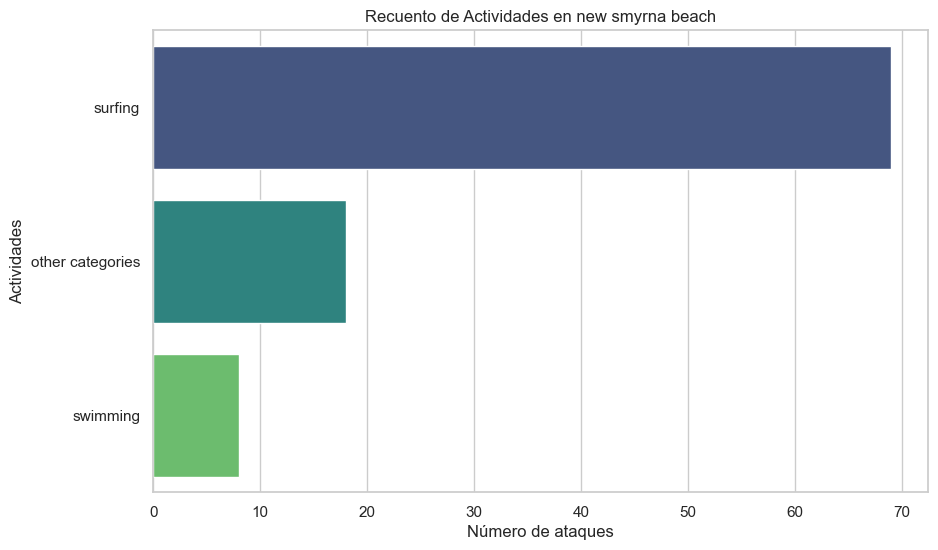

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_activities ['count'], y=top_activities .index, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Número de ataques')
plt.ylabel('Actividades')
plt.title('Recuento de Actividades en new smyrna beach')

# Mostrar el gráfico
plt.show()

### El top 3 de actividades que estaba la gente haciendo cuando fueron atacados es:
surfing - 69
other categories
swimming

## Especies de tiburones de los casos en new smyrna (zona geográfica TOP)

In [116]:
#crear dataframe de la ubicación
filtered_location= florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
species_location = top_location.groupby('Species')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente
species_location = species_location.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
species_location

# Obtener los 2 primeros resultados
top_especies = species_location.head(10)

# Imprimir los 3 primeros resultados
top_especies

,count,mean,median,std,min,max
Species,,,,,,
undefined specie,84,23.964286,19.5,12.721717,6.0,61.0
blacktip shark,7,31.142857,29.0,15.475018,15.0,55.0
,2,14.500000,14.5,0.707107,14.0,15.0
bull shark,1,21.000000,21.0,NaN,21.0,21.0
spinner shark,1,13.000000,13.0,NaN,13.0,13.0


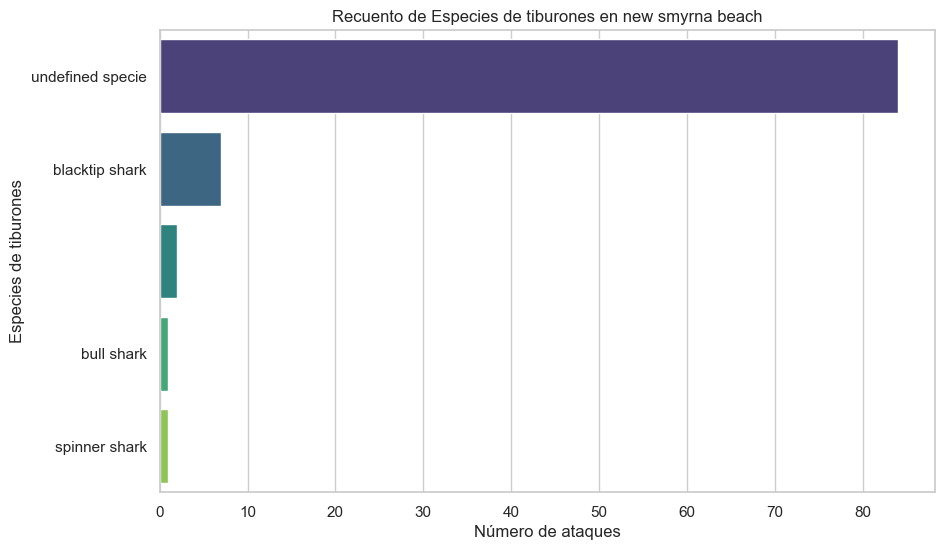

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_especies ['count'], y=top_especies .index, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Número de ataques')
plt.ylabel('Especies de tiburones')
plt.title('Recuento de Especies de tiburones en new smyrna beach')

# Mostrar el gráfico
plt.show()

### En la mayoría de casos, no sabemos decir qué especie de tiburón produjo el ataque. Pero hay tiburones involucrados como el blakctip y el bull shark

# Número de muertes en los casos en new smyrna (zona geográfica TOP)

In [118]:
#crear dataframe de la ubicación
filtered_location = florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
fatalities_location = top_location.groupby('Fatality')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente
fatalities_location = fatalities_location.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
fatalities_location

# Obtener los 2 primeros resultados
top_muertes = fatalities_location.head(10)

# Imprimir los 3 primeros resultados
top_muertes

,count,mean,median,std,min,max
Fatality,,,,,,
n,93,24.419355,20.0,12.857347,6.0,61.0
not defined,2,11.500000,11.5,0.707107,11.0,12.0


### Según los datos recopilados no hay registros de muertes por ataque de tiburón en esta zona

# Filtro por género de los casos en esta zona

In [119]:
#crear dataframe de la ubicación
filtered_location = florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
genre_location = top_location.groupby('Sex')['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente
genre_location = genre_location.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
genre_location

# Obtener los 2 primeros resultados
top_genre = genre_location.head(10)

# Imprimir los 3 primeros resultados
top_genre

,count,mean,median,std,min,max
Sex,,,,,,
M,80,24.725000,20.5,12.282513,6.0,56.0
F,13,21.538462,15.0,16.894848,8.0,61.0
not defined,2,18.000000,18.0,1.414214,17.0,19.0


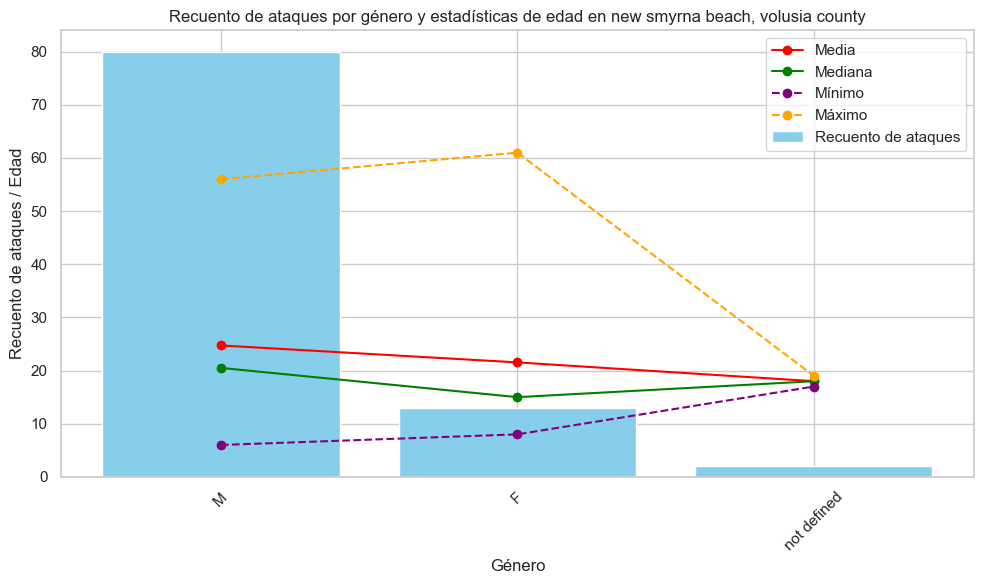

In [120]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para el recuento de actividades por género
plt.bar(top_genre.index, top_genre['count'], color='skyblue', label='Recuento de ataques')

# Añadir líneas para representar las estadísticas de edad
plt.plot(top_genre.index, top_genre['mean'], marker='o', color='red', linestyle='-', label='Media')
plt.plot(top_genre.index, top_genre['median'], marker='o', color='green', linestyle='-', label='Mediana')
plt.plot(top_genre.index, top_genre['min'], marker='o', color='purple', linestyle='--', label='Mínimo')
plt.plot(top_genre.index, top_genre['max'], marker='o', color='orange', linestyle='--', label='Máximo')

# Añadir etiquetas y título
plt.xlabel('Género')
plt.ylabel('Recuento de ataques / Edad')
plt.title('Recuento de ataques por género y estadísticas de edad en new smyrna beach, volusia county')
plt.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()



### La gran mayoría de ataques fueron a hombres, con una edad media de 24 años.

# Estacionalidad de los ataques

In [121]:
#crear dataframe de la ubicación
filtered_location = florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
month_location = top_location.groupby("Month")['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente
month_location = month_location.sort_values(by='count', ascending=False)

# Imprimir los resultados ordenados
month_location

# Obtener los 2 primeros resultados
top_estaciones = month_location.head(1000)

# Imprimir los 3 primeros resultados
top_estaciones

,count,mean,median,std,min,max
Month,,,,,,
sep,20,29.500000,23.5,14.894365,8.0,56.0
aug,18,21.000000,17.5,11.651811,11.0,54.0
apr,14,24.285714,21.0,13.280573,7.0,50.0
jul,12,19.500000,16.5,9.424340,9.0,40.0
may,10,26.500000,22.0,14.983324,6.0,55.0
jun,8,26.500000,23.0,14.937967,11.0,61.0
oct,6,25.500000,23.0,11.640447,15.0,46.0
nov,4,17.250000,17.0,2.986079,14.0,21.0
mar,3,17.666667,17.0,3.055050,15.0,21.0


In [122]:
#crear dataframe de la ubicación
filtered_location = florida_df.groupby('Location')
top_location = filtered_location.get_group('new smyrna beach, volusia county')

#actividades en la top location
month_location = top_location.groupby("Month")['Age'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

#orden descendente

# Imprimir los resultados ordenados

# Obtener los 2 primeros resultados
top_estaciones = month_location.head(1000)

# Imprimir los 3 primeros resultados
top_estaciones

,count,mean,median,std,min,max
Month,,,,,,
apr,14,24.285714,21.0,13.280573,7.0,50.0
aug,18,21.000000,17.5,11.651811,11.0,54.0
jul,12,19.500000,16.5,9.424340,9.0,40.0
jun,8,26.500000,23.0,14.937967,11.0,61.0
mar,3,17.666667,17.0,3.055050,15.0,21.0
may,10,26.500000,22.0,14.983324,6.0,55.0
nov,4,17.250000,17.0,2.986079,14.0,21.0
oct,6,25.500000,23.0,11.640447,15.0,46.0
sep,20,29.500000,23.5,14.894365,8.0,56.0


### La estacionalidad de los casos mayoritariamente en los meses de Abril y Mayo y entre Julio y Septiembre, por lo tanto se puede decir que la estacionalidad se situa desde el comienzo de la primavera hasta el comienzo del otoño, como es evidente con la reducción afluencia de público a las zonas de costa.


/var/folders/2s/1g83nylj0zqd8ztkfn00l9t80000gn/T/ipykernel_14162/3055157583.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_estaciones['num_month'] = top_estaciones.index.map(lambda x: month_to_num[x.lower()])


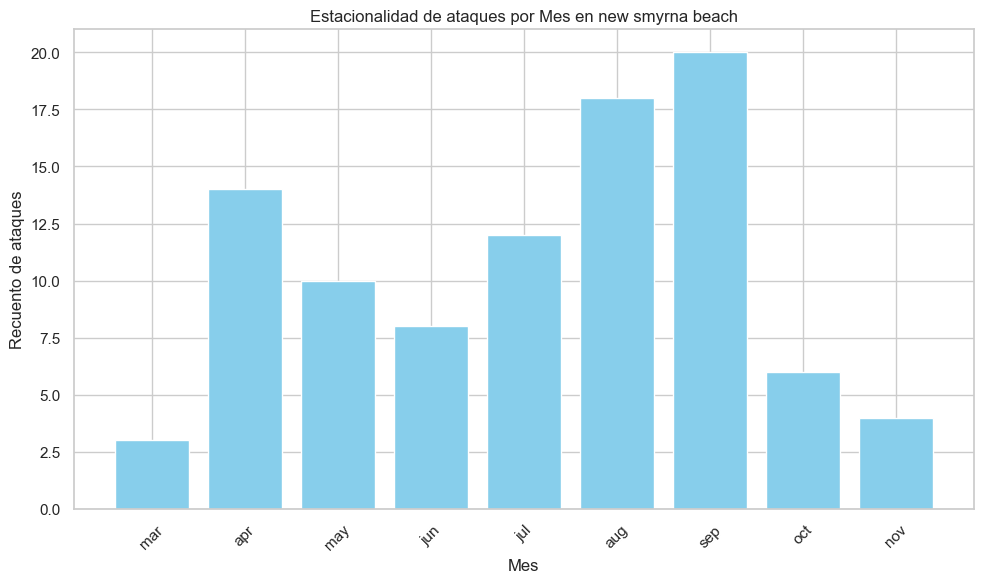

In [123]:
import matplotlib.pyplot as plt

# Diccionario para mapear los nombres de los meses a números de mes
month_to_num = {
    'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12, 'aug': 8
}

# Convertir los nombres de los meses en el DataFrame a números de mes
top_estaciones['num_month'] = top_estaciones.index.map(lambda x: month_to_num[x.lower()])

# Ordenar el DataFrame por el número de mes
sorted_df = top_estaciones.sort_values(by='num_month')

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para el recuento de actividades por mes
plt.bar(sorted_df.index, sorted_df['count'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Recuento de ataques')
plt.title('Estacionalidad de ataques por Mes en new smyrna beach')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan los elementos
plt.show()








# Geolocalización de los ataques

In [124]:
# Mapa Paises
!pip install folium
import pandas as pd
import folium

# Ejemplo de DataFrame con datos de ubicación (latitud y longitud)
data = {
    'Paises': ['USA', 'Australia', 'Southafrica'],
    'Latitud': [37.09024, -25.274398, -30.559482],
    'Longitud': [-95.712891, 133.775136, 22.937506]
}
filtered_location = pd.DataFrame(data)

# Crear un mapa centrado en una ubicación inicial
mapa_paises = folium.Map(location=[37.09024, -95.712891], zoom_start=4)

# Agregar marcadores al mapa basados en los datos del DataFrame
for index, row in filtered_location.iterrows():
    folium.Marker(location=[row['Latitud'], row['Longitud']], popup=row['Paises']).add_to(mapa_paises)

# Mostrar el mapa
mapa_paises


In [125]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en una ubicación inicial
mapa_calor = folium.Map(location=[29.0258132, -80.927127], zoom_start=7)

# Crear un DataFrame con los datos de ubicación
data_locs = {
    'Localizaciones': ['new smyrna beach, volusia county', 'ponce inlet, volusia county', 'daytona beach, volusia county', 'melbourne beach, brevard county', 'ponce inlet, new smyrna beach, volusia county', 'ormond beach, volusia county', 'new smyrna beach', 'florida keys, monroe county', 'cocoa beach, brevard county', 'playalinda beach, canaveral national seashore, brevard county', 'riviera beach, palm beach county', 'florida keys', 'singer island, riviera beach, palm beach county', 'vero beach, indian river county', 'fort lauderdale, broward county', 'sanibel island, lee county', 'stuart beach, martin county', 'ponte vedra beach, st johns county'],
    'Latitud': [29.0258132, 29.0963729, 29.21081472, 28.0684067, 29.0645698, 29.2854132, 29.0258132, 24.6670875, 28.3184107, 28.78627, 26.784343, 24.6670875, 26.7850625, 27.6387163, 26.1223084, 26.440359, 27.2256486, 30.2396865],
    'Longitud': [-80.9271271, -80.93699836, -81.0228331, -80.5607951, -80.915154, -81.0557921, -80.9271271, -81.5831421, -80.6094959, -80.75415, -80.0650293, -81.5831421, -80.0375408, -80.3975399, -80.1433786, -82.1137049, -80.2202114, -81.3856384]
}
filtered_location = pd.DataFrame(data_locs)

# Convertir los datos de ubicación a un formato adecuado para HeatMap
locations = filtered_location[['Latitud', 'Longitud']].values.tolist()

# Crear un mapa de calor
heat_map = HeatMap(locations)

# Añadir el mapa de calor al mapa principal
mapa_calor.add_child(heat_map)

# Mostrar el mapa
mapa_calor



In [126]:
shark_df_rel.head()

,Date,Global Activity,Year,Type,Country,State,Location,Activity,Month,Name,Sex,Age,Injury,Fatality,Time,Species,Source
0,15 mar 2024,swimming,2024,unprovoked,australia,queensland,bargara beach,swimming,mar,brooklyn sauer,F,13.0,"minor injuries to back, abdomen and legs",not defined,16h00,tiger shark,"yahoo news, 3/15/2024"
2,02 mar-2024,swimming,2024,unprovoked,usa,hawaii,"rainbows, oahu",swimming,mar,not defined,F,11.0,lacerations to left foot,n,13h30,undefined specie,"hawaii news now, 3/4/2024"
3,25 feb-2024,other categories,2024,unprovoked,australia,western australia,"sandlnd island, jurian bay",not defined,feb,female,F,46.0,leg bitten,n,11h30,tiger shark,"wa today, 2/26/2024"
4,14 feb-2024,fishing,2024,unprovoked,india,maharashtra,"vaitarna river, palghar district",fishing,feb,vicky suresh govari,M,32.0,calf of lower left leg injured,n,not defined,bull shark,"times of india, 2/14/2024"
6,29 jan-2024,swimming,2024,unprovoked,australia,new south wales,"elizabeth bay, sydney harbor",swimming,jan,lauren o'neill,F,29.0,right leg bitten,n,20h00,bull shark,"nine news, 12/31/2024"


In [127]:
florida_df.head()

,Date,Global Activity,Year,Type,Country,State,Location,Activity,Month,Name,Sex,Age,Injury,Fatality,Time,Species,Source
24,05 nov-2023,swimming,2023,unprovoked,usa,florida,"juno beach, palm beach county",swimming,nov,steven reinhardt,M,66.0,lacerations to right forearm,n,10h30,undefined specie,"abc, 11/15/2023"
40,12 sep-2023,surfing,2023,questionable,usa,florida,"new smyrna beach, volusia county",surfing,sep,mark summersett,M,38.0,llacerations to face and chin,n,07h50,undefined specie,"daytona beach news journal, 9/13/2023"
45,04 sep 2023,other categories,2023,unprovoked,usa,florida,"ponce inlet, volusia county",wading,sep,female,F,37.0,right foot bitten,n,not defined,undefined specie,"click orlando, 9/4/2023"
54,31 jul-2023,surfing,2023,unprovoked,usa,florida,"new smyrna beach, volusia county",surfing,jul,brandon boncore,M,22.0,ankle injured,n,09h30,undefined specie,"fox35, 7/31/2023"
55,30 jul-2023,fishing,2023,unprovoked,usa,florida,"anna maria island, manatee county",spearfishing,jul,male,M,22.0,lower leg bitten,n,15h30,undefined specie,"r. babington, gsaf"
